In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve,plot_roc_curve, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier=None, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('x', 'o', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if classifier:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=np.array([cmap(idx)]),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# Ploy2 效果

In [3]:
X = np.arange(6).reshape(3, 2)
X
poly = PolynomialFeatures(2)
poly.fit_transform(X)
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[0, 1],
       [2, 3],
       [4, 5]])

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

# Ploy2 + logistic regression

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

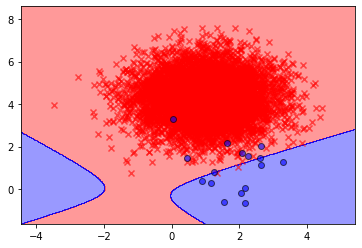

In [4]:
X, y = make_blobs(n_samples=[20000,50], random_state=0)
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = make_pipeline(PolynomialFeatures(2), LogisticRegression())
model.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,model)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=True, order='C')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

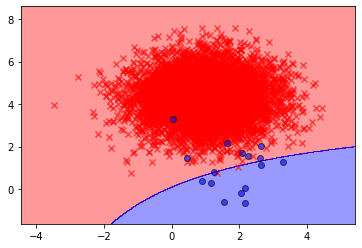

In [5]:
X, y = make_blobs(n_samples=[20000,50], random_state=0)
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = make_pipeline(PolynomialFeatures(interaction_only=True), LogisticRegression())
model.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,model)

# 提高維度(2->3)

/Users/yehjames/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

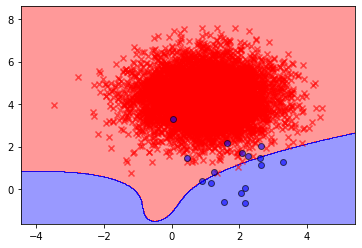

In [6]:
X, y = make_blobs(n_samples=[20000,50], random_state=0)
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = make_pipeline(PolynomialFeatures(3), LogisticRegression())
model.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,model)

# make_blobs 更多應用

/Users/yehjames/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

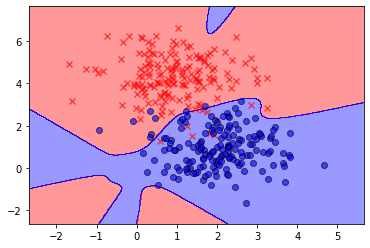

In [7]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
         random_state=0)
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = make_pipeline(PolynomialFeatures(10), LogisticRegression())
model.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,model)

# 準確度(Accuracy)

In [8]:
model.score(X_test, y_test)

0.9484848484848485

In [9]:
confusion_matrix(y_test, model.predict(X_test))

array([[158,   9],
       [  8, 155]])

In [10]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       167
           1       0.95      0.95      0.95       163

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



# 只要把下面的lr都改成model 即可觀察新model的 metric

# TF, FP, FN, TN

In [11]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

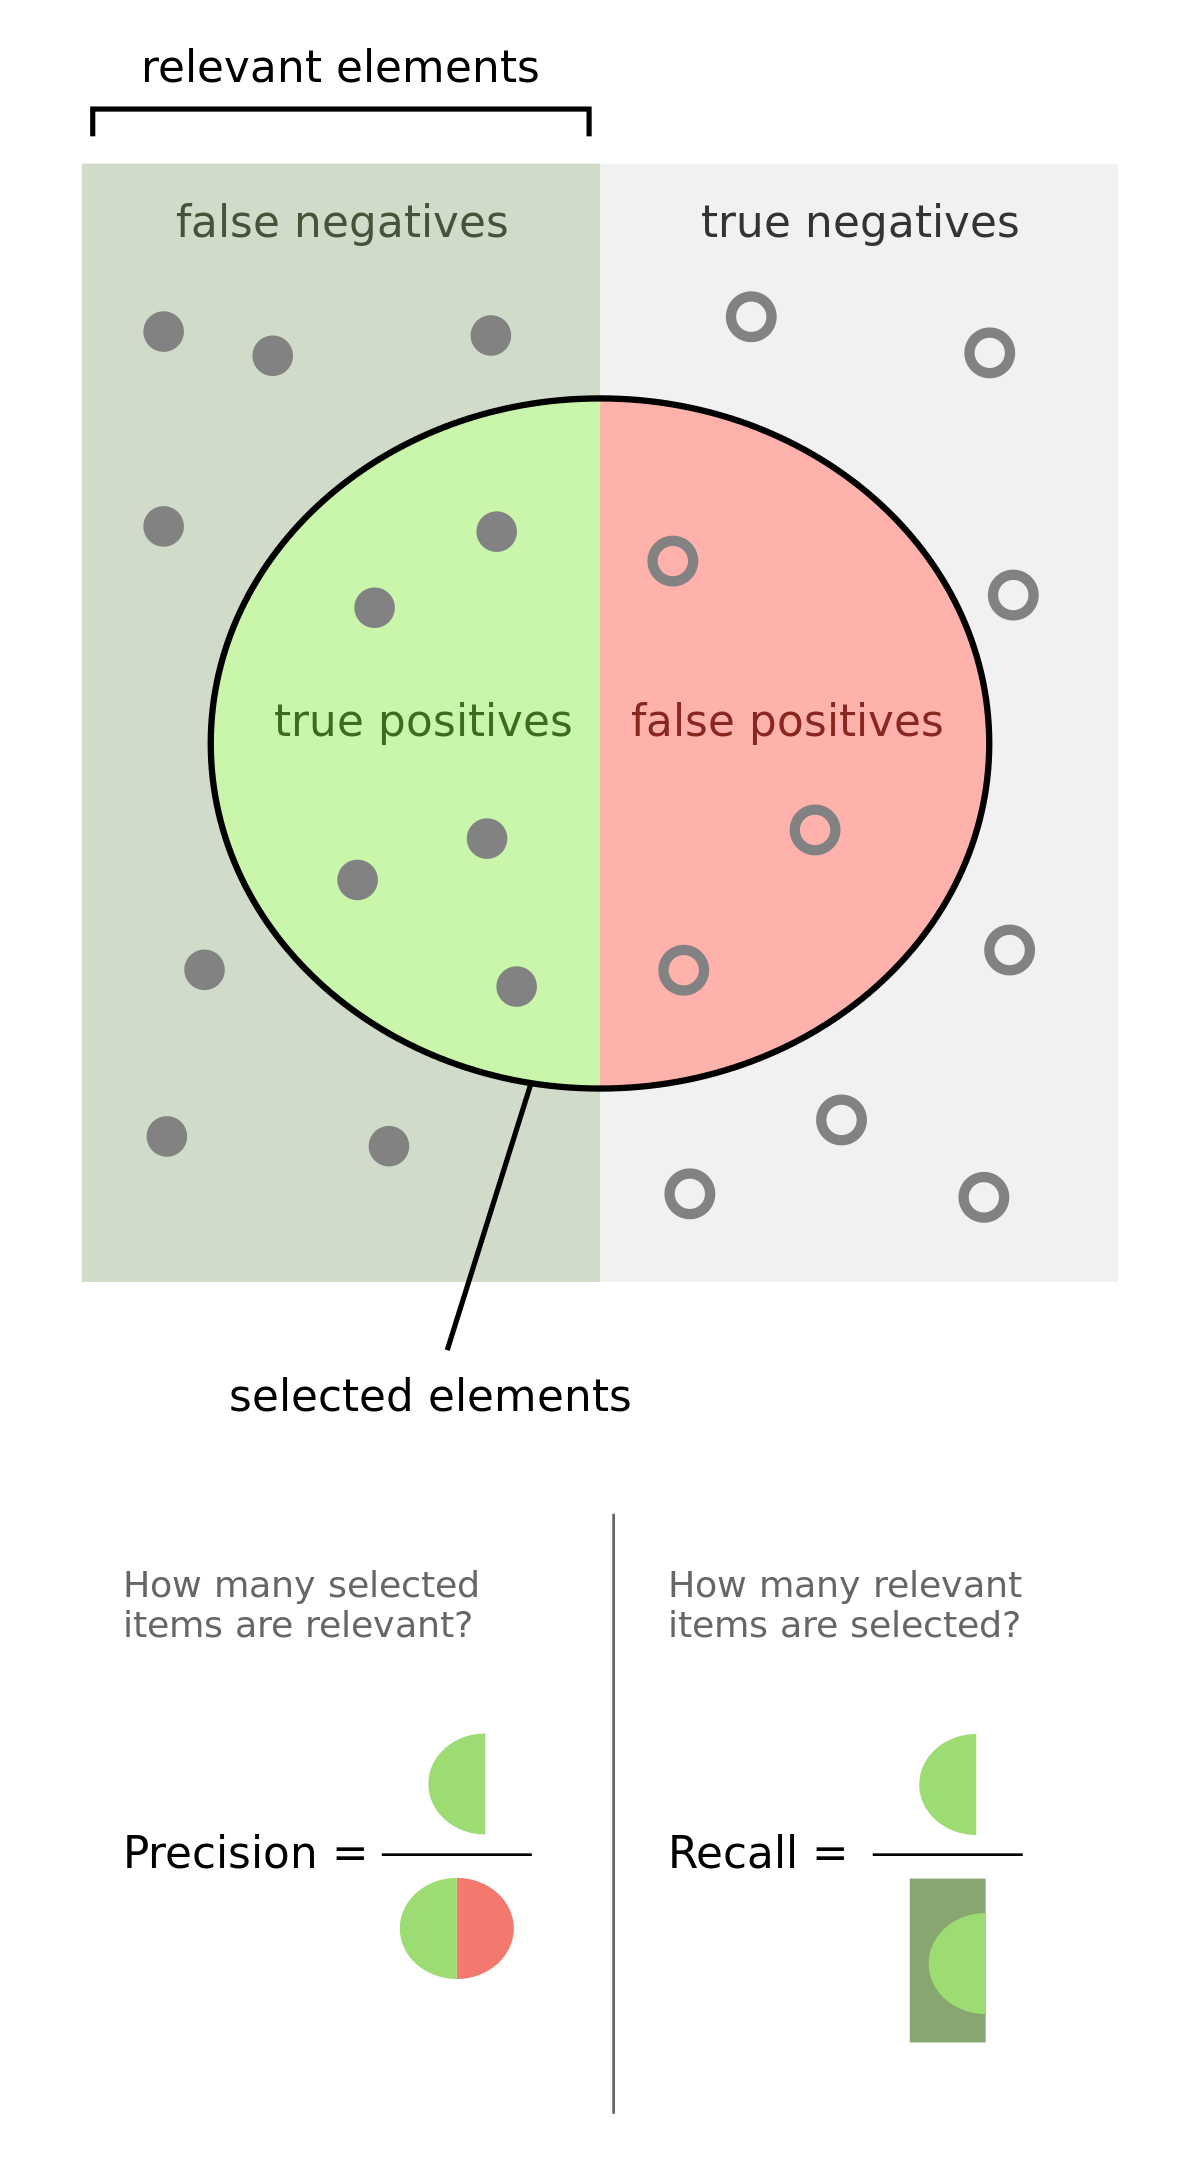

# 精準度(Precision)

In [ ]:
precision_score(lr.predict(X_test),y_test)

# 召回率(Recall)

In [ ]:
recall_score(lr.predict(X_test),y_test)

# F1 Score

F1 = 2 * (precision * recall) / (precision + recall) 
範圍0~1之間
假設p和r一個是1.0一個是0.1,算術平均會接近0.5 而調和平均接近0.2，這說明調和平均會強調兩者的一致性，明顯不一致時傾向於小的值，這更符合人們的直觀感受。

In [ ]:
f1_score(lr.predict(X_test),y_test)

# PR-curve

In [ ]:
plot_precision_recall_curve(lr,X_test,y_test)

# ROC-AUC curve

In [ ]:
# 參考 https://zhuanlan.zhihu.com/p/31256633
plot_roc_curve(lr,X_test,y_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
np.around(fpr,decimals=3)
np.around(tpr,decimals=3)
np.around(thresholds,decimals=3)


## 正例調整為500個

In [ ]:
X, y = make_blobs(n_samples=[20000,500], random_state=0)
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,lr)

In [ ]:
plot_precision_recall_curve(lr,X_test,y_test)

In [ ]:
plot_roc_curve(lr,X_test,y_test)

# 多元分類

In [ ]:
X, y = make_blobs(n_samples=[20000,1000,500], random_state=0)

In [ ]:
plot_decision_regions(X,y)

In [ ]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
plot_decision_regions(X_test, y_test,lr)

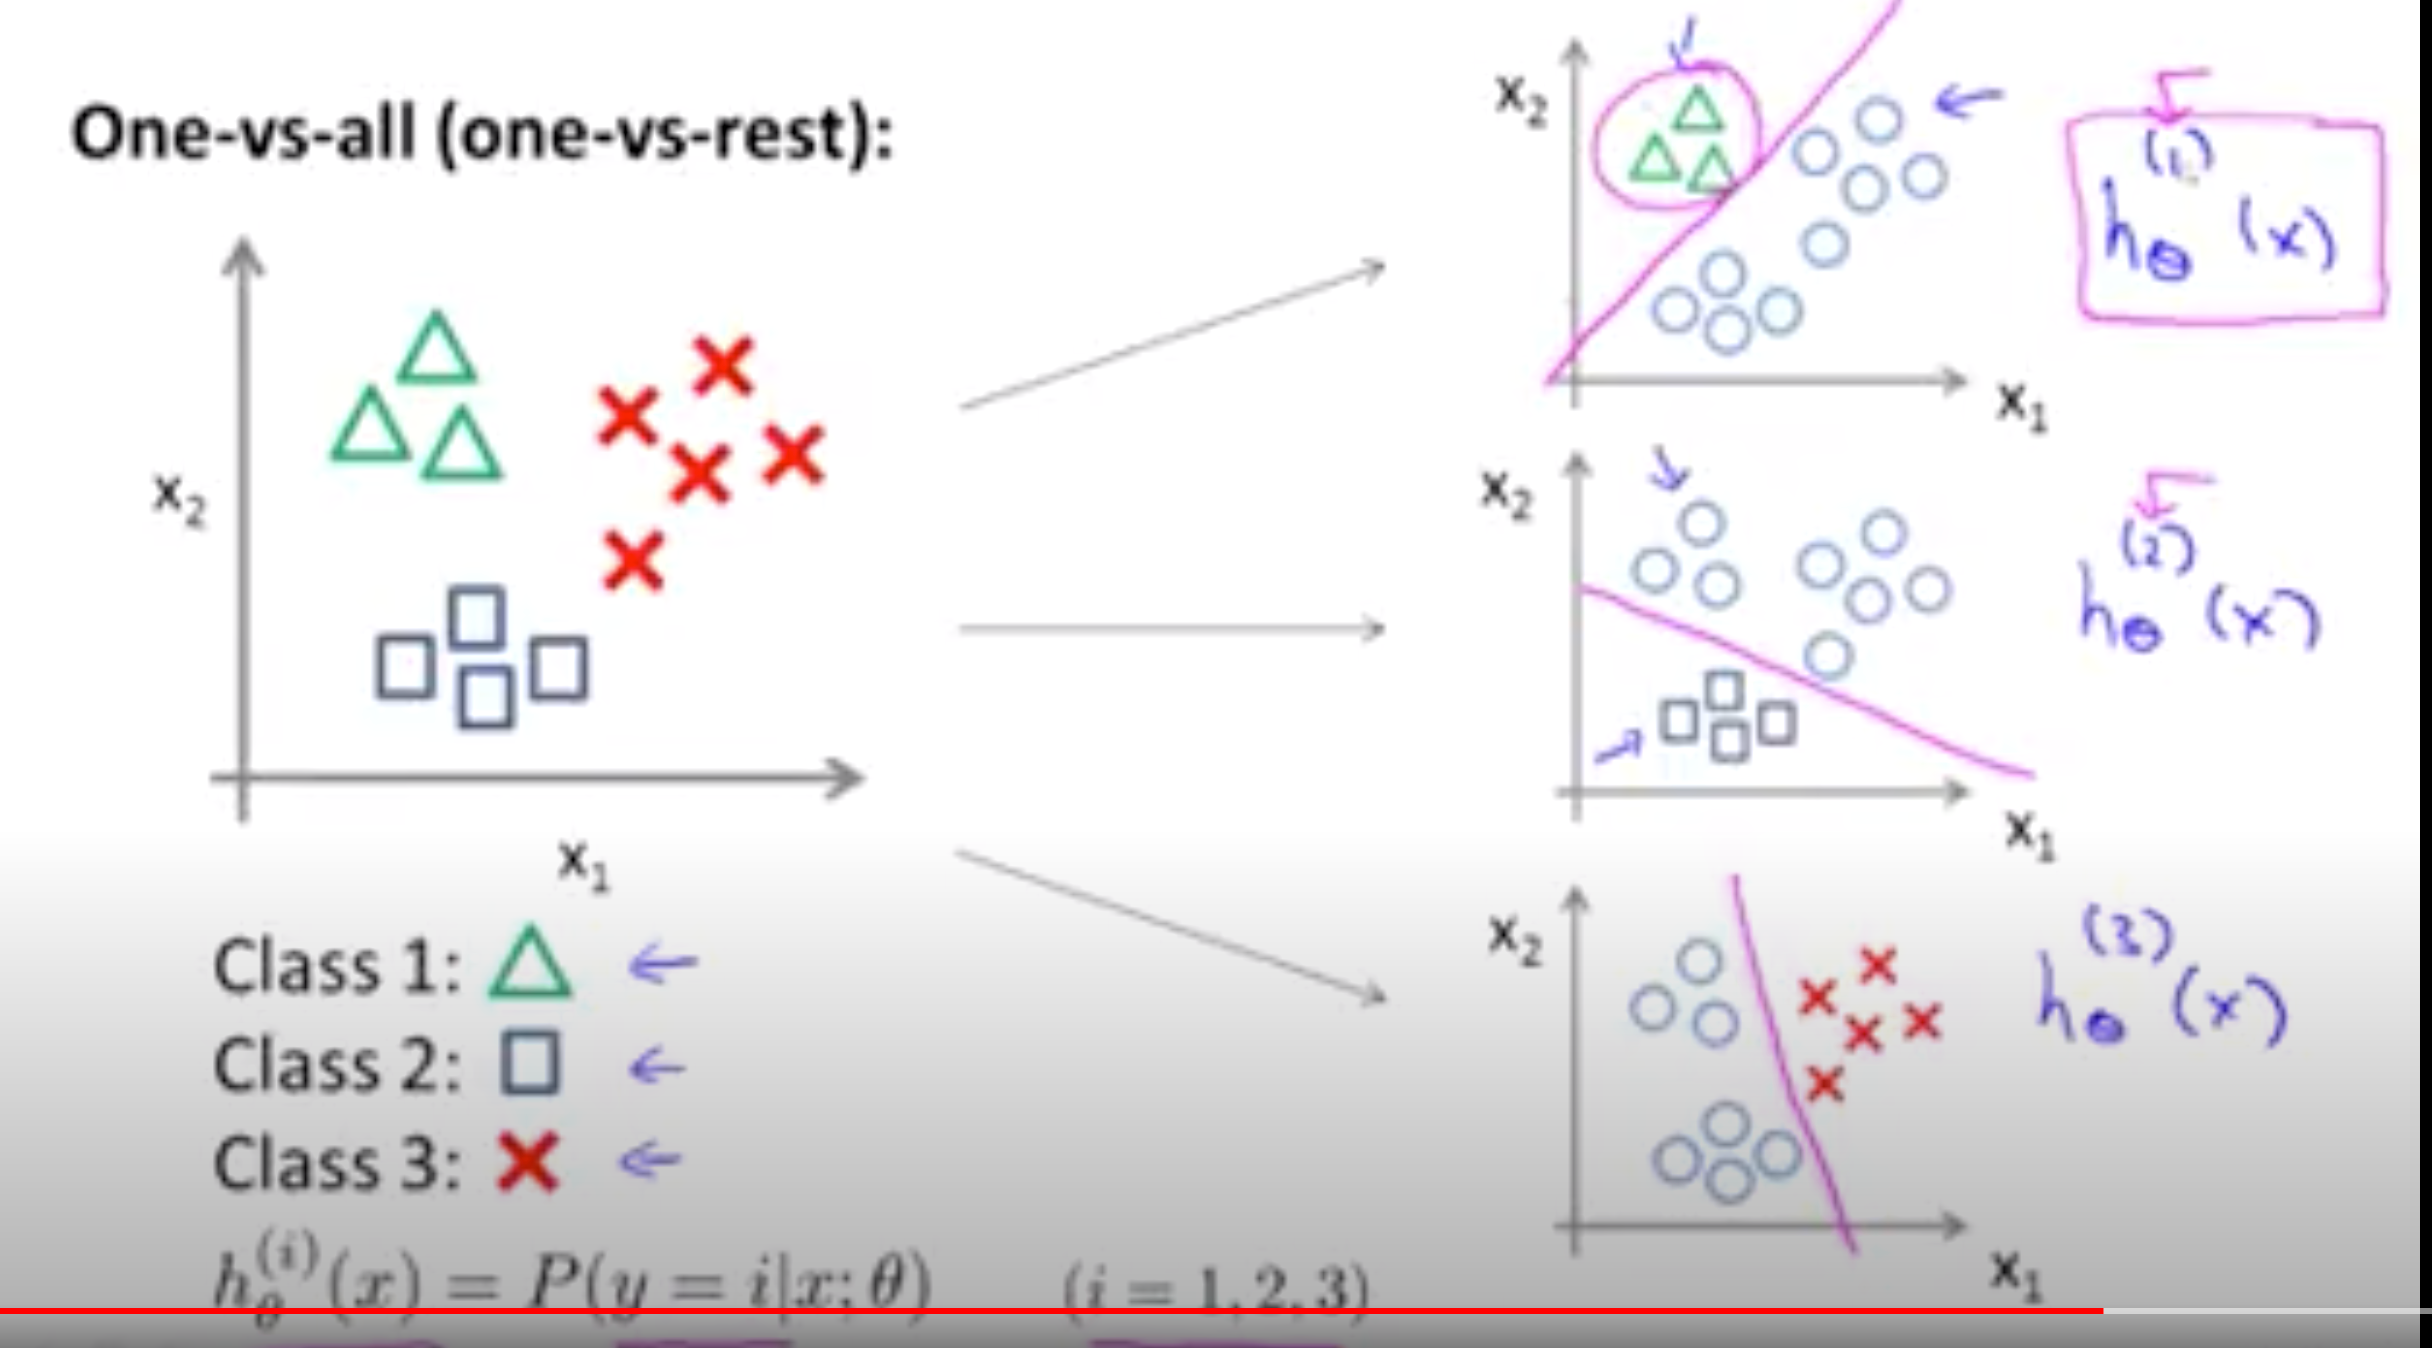

In [ ]:
print(classification_report(lr.predict(X_test), y_test))